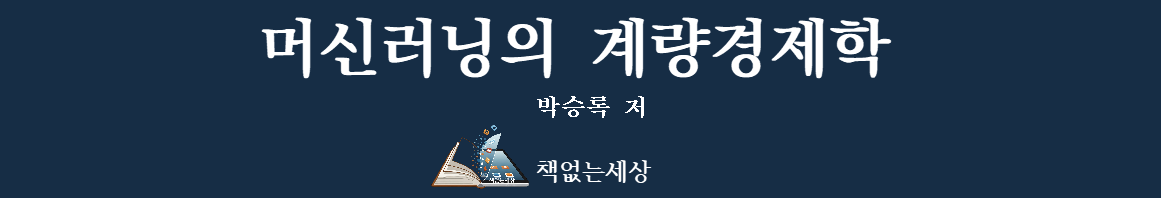

# Part 5: 정성적 선택모형, 제한 종속변수 모형

## Chapter 1. 정성적 선택모형

In [2]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:/JupyterWDirectory/MyStock")
os.getcwd()

'E:\\JupyterWDirectory\\MyStock'

In [4]:
exec(open('E:/JupyterWDirectory/MyStock/Functions/Traditional_Econometrics_Lib.py').read())

In [ ]:
"""
# #####################################################################
# 위의 함수는 아래 다양한 라이브러리와 함수를 한 문장으로 불러오는 방법
# #####################################################################

# 분석에 사용될 라이브러리(Libraries for the Analysis) 불러오기
# Libraries for the Analysis of Traditional Econometrics.py
# 불러오는 방법:  "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# #####################################################################

# 만약 특정 라이브러리가 설치되지 않았다는 에러 메시지가 나타날 때는 
# 해당 라이브러리를 설치하여야 함
# 아래 라이브러리를 하나 하나 실행하면서 어떤 라이브러리가 설치되지 않았는지 확인하여도 됨
# #####################################################################
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer.stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random

from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model

import wooldridge as woo
from imfpy.retrievals import dots
import wbdata
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")
"""\

### 라. 파이썬에서 프로빗 모형과 로짓 모형의 추정 

In [5]:
import wooldridge as woo
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats

# 데이터 읽어들이기
mroz = woo.dataWoo('mroz')
equation = 'inlf ~ nwifeinc + educ + exper + I(exper**2) + age + kidslt6 + kidsge6'

# 선형확률모형(linear probability model)의 추정
reg_lin = smf.ols(formula=equation, data=mroz)
results_lin = reg_lin.fit(cov_type='HC3')
print(results_lin.summary())

# 로짓모형(logit model)의 추정
reg_logit = smf.logit(formula= equation, data=mroz)
results_logit = reg_logit.fit()
print(results_logit.summary())

# 프로빗 모형(probit model)
reg_probit = smf.probit(formula=equation, data=mroz)
results_probit = reg_probit.fit(disp=0)
print(results_probit.summary())


                            OLS Regression Results                            
Dep. Variable:                   inlf   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     61.35
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.55e-69
Time:                        12:27:50   Log-Likelihood:                -423.89
No. Observations:                 753   AIC:                             863.8
Df Residuals:                     745   BIC:                             900.8
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5855      0.154      3.812

In [6]:
# 전반적 유의성 검정(test of overall significance)
llr1_manual = 2 * (results_probit.llf - results_probit.llnull)
print(f'llr1_manual: {llr1_manual}\n')
print(f'results_probit.llr: {results_probit.llr}\n')
print(f'results_probit.llr_pvalue: {results_probit.llr_pvalue}\n')

# 제약조건의 검정을 위한 왈드테스트(Wald test)
# H0: experience and age 변수는 무관한 변수
hypotheses = ['exper=0', 'I(exper ** 2)=0', 'age=0']
waldstat = results_probit.wald_test(hypotheses)
teststat2_autom = waldstat.statistic
pval2_autom = waldstat.pvalue
print(f'teststat2_autom: {teststat2_autom}\n')
print(f'pval2_autom: {pval2_autom}\n')


llr1_manual: 227.14202283719237

results_probit.llr: 227.14202283719237

results_probit.llr_pvalue: 2.0086732957627125e-45

teststat2_autom: [[110.91852003]]

pval2_autom: 6.960738406731183e-24



In [7]:
# 특별한 관측치 정의후 예측
X_new = pd.DataFrame(
    {'nwifeinc': [100, 0], 'educ': [5, 17], 'exper': [0, 30], 
     'age': [20, 52], 'kidslt6': [2, 0], 'kidsge6': [0, 0]})
predictions_lin = results_lin.predict(X_new)
predictions_logit = results_logit.predict(X_new)
predictions_probit = results_probit.predict(X_new)

print(f'predictions_lin: \n{predictions_lin}\n')
print(f'predictions_logit: \n{predictions_logit}\n')
print(f'predictions_probit: \n{predictions_probit}\n')

predictions_lin: 
0   -0.410458
1    1.042808
dtype: float64

predictions_logit: 
0    0.005218
1    0.950049
dtype: float64

predictions_probit: 
0    0.001065
1    0.959870
dtype: float64



In [8]:
# 평균 한계효과의 측정 (manual average partial effects)
APE_lin = np.array(results_lin.params)

xb_logit = results_logit.fittedvalues
factor_logit = np.mean(stats.logistic.pdf(xb_logit))
APE_logit_manual = results_logit.params * factor_logit

xb_probit = results_probit.fittedvalues
factor_probit = np.mean(stats.norm.pdf(xb_probit))
APE_probit_manual = results_probit.params * factor_probit

table_manual = pd.DataFrame({'APE_lin': np.round(APE_lin, 4),
                             'APE_logit_manual': np.round(APE_logit_manual, 4),
                             'APE_probit_manual': np.round(APE_probit_manual, 4)})
print(f'table_manual: \n{table_manual}\n')

# 함수를 이용한 평균한계효과의 측정
coef_names = np.array(results_lin.model.exog_names)
coef_names = np.delete(coef_names, 0)  # drop Intercept

APE_logit_autom = results_logit.get_margeff().margeff
APE_probit_autom = results_probit.get_margeff().margeff

table_auto = pd.DataFrame({'coef_names': coef_names,
                           'APE_logit_autom': np.round(APE_logit_autom, 4),
                           'APE_probit_autom': np.round(APE_probit_autom, 4)})
print(f'table_auto: \n{table_auto}\n')


table_manual: 
               APE_lin  APE_logit_manual  APE_probit_manual
Intercept       0.5855            0.0760             0.0812
nwifeinc       -0.0034           -0.0038            -0.0036
educ            0.0380            0.0395             0.0394
exper           0.0395            0.0368             0.0371
I(exper ** 2)  -0.0006           -0.0006            -0.0006
age            -0.0161           -0.0157            -0.0159
kidslt6        -0.2618           -0.2578            -0.2612
kidsge6         0.0130            0.0107             0.0108

table_auto: 
      coef_names  APE_logit_autom  APE_probit_autom
0       nwifeinc          -0.0038           -0.0036
1           educ           0.0395            0.0394
2          exper           0.0368            0.0371
3  I(exper ** 2)          -0.0006           -0.0006
4            age          -0.0157           -0.0159
5        kidslt6          -0.2578           -0.2612
6        kidsge6           0.0107            0.0108



### 5) 몬테칼로 실험을 통한 선형 확률모형, 로짓 모형, 프로빗 모형 추정

In [9]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as stats

# Random seed:
np.random.seed(1234567)

y = stats.binom.rvs(1, 0.5, size=100)
X = stats.norm.rvs(0, 1, size=100) + 2 * y
sim_data = pd.DataFrame({'y': y, 'X': X})

# 선형확률 모형의 추정
reg_lin = smf.ols(formula='y ~ X', data=sim_data)
results_lin = reg_lin.fit()
print(results_lin.summary())

#, 로짓모형의 추정
reg_logit = smf.logit(formula='y ~ X', data=sim_data)
results_logit = reg_logit.fit(disp=0)
print(results_logit.summary())

# 프로빗 모형의 추정
reg_probit = smf.probit(formula='y ~ X', data=sim_data)
results_probit = reg_probit.fit(disp=0)
print(results_probit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     104.4
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           4.08e-17
Time:                        12:29:03   Log-Likelihood:                -34.667
No. Observations:                 100   AIC:                             73.33
Df Residuals:                      98   BIC:                             78.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1698      0.042      4.062      0.0

In [10]:
# 한계효과(partial effects)의 계산
PE_lin = np.repeat(results_lin.params['X'], 100)

Xb_logit = results_logit.fittedvalues
factor_logit = stats.logistic.pdf(Xb_logit)
PE_logit = results_logit.params['X'] * factor_logit

Xb_probit = results_probit.fittedvalues
factor_probit = stats.norm.pdf(Xb_probit)
PE_probit = results_probit.params['X'] * factor_probit
Partial1 = pd.DataFrame(data = [X, PE_lin, PE_logit, PE_probit], index = ["X", "LPM", "Logit", "Probit"]).T
print(Partial1)


           X       LPM     Logit    Probit
0  -0.347438  0.268804  0.059217  0.059822
1  -1.300040  0.268804  0.007021  0.001925
2   1.210626  0.268804  0.571954  0.528997
3   0.850885  0.268804  0.478487  0.467262
4  -1.261498  0.268804  0.007664  0.002282
..       ...       ...       ...       ...
95  2.025416  0.268804  0.272678  0.301969
96  1.917234  0.268804  0.323647  0.347929
97  0.206200  0.268804  0.184386  0.211658
98  1.967921  0.268804  0.299272  0.326419
99 -1.709153  0.268804  0.002763  0.000270

[100 rows x 4 columns]


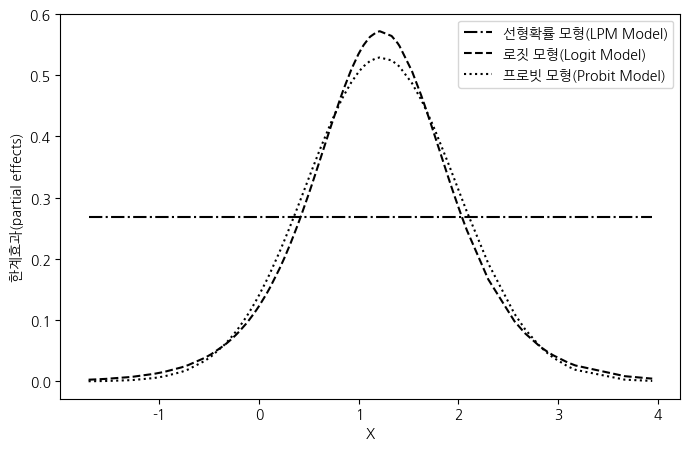

In [11]:
Partial2 = Partial1.sort_values(by='X', ascending=True)

plt.figure(figsize =(8, 5))
plt.plot(Partial2['X'], Partial2['LPM'], linestyle='-.', color='black', label='선형확률 모형(LPM Model)')
plt.plot(Partial2['X'], Partial2['Logit'], linestyle='--', color='black', label='로짓 모형(Logit Model)')
plt.plot(Partial2['X'], Partial2['Probit'], linestyle=':', color='black', label='프로빗 모형(Probit Model)')
plt.ylabel('한계효과(partial effects)')
plt.xlabel('X')
plt.legend()
plt.show()


In [12]:
# 예측(prediction)
X_new = pd.DataFrame({'X': np.linspace(min(X), max(X), 50)})
predictions_lin = results_lin.predict(X_new)
predictions_logit = results_logit.predict(X_new)
predictions_probit = results_probit.predict(X_new)

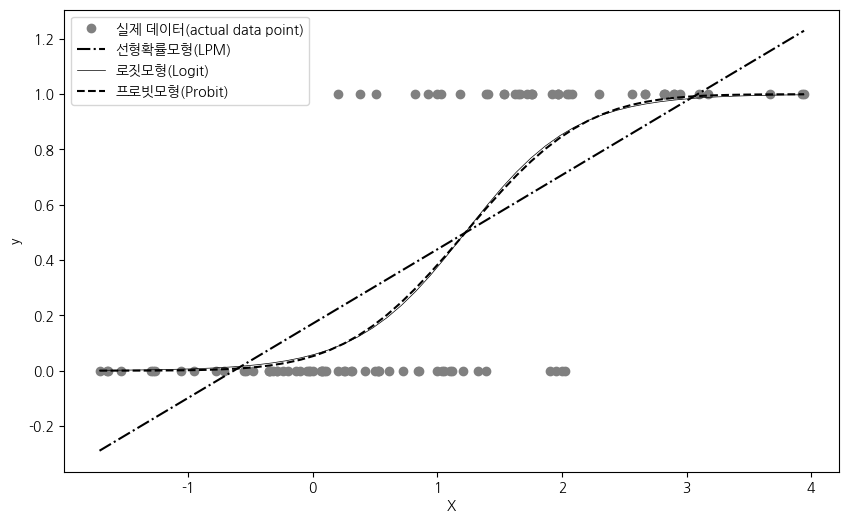

In [13]:
# 그래프 그리기
plt.figure(figsize =(10, 6))
plt.plot(X, y, color='grey', marker='o', linestyle='', label='실제 데이터(actual data point)')
plt.plot(X_new['X'], predictions_lin,
         color='black', linestyle='-.', label='선형확률모형(LPM)')
plt.plot(X_new['X'], predictions_logit,
         color='black', linestyle='-', linewidth=0.5, label='로짓모형(Logit)')
plt.plot(X_new['X'], predictions_probit,
         color='black', linestyle='--', label='프로빗모형(Probit)')
plt.ylabel('y')
plt.xlabel('X')
plt.legend(loc = 'upper left')
#plt.savefig('PyGraphs/Binary-Predictions.pdf')

## 3. 다항 회귀 모형(multinomial regression model)

### 가. 다항 로짓 모형

In [15]:
# 데이터 읽어들이기
df = pd.read_csv('Data/nels_small.csv')
display(df) 

# 다항로짓모형의 추정(설명변수는 선택자의 특징을 나타내는 자료이어야 함)
mlogit = smf.mnlogit('psechoice ~ hscath + grades + faminc + famsiz + parcoll + female + black', data=df)
results_ML = mlogit.fit()
print(results_ML.summary())

# 한계효과 계산
me = results_ML.get_margeff(at= 'mean', method = 'dydx')
print(me.summary())

,psechoice,hscath,grades,faminc,famsiz,parcoll,female,black
0,2,0,9.08,62.5,5,0,0,0
1,2,0,8.31,42.5,4,0,1,0
2,3,0,7.42,62.5,4,0,1,0
3,3,0,7.42,62.5,4,0,1,0
4,3,0,7.42,62.5,4,0,1,0
...,...,...,...,...,...,...,...,...
995,2,0,8.13,62.5,4,0,0,0
996,3,0,5.28,87.5,6,0,1,0
997,1,0,7.54,30.0,5,0,1,0
998,3,0,3.64,42.5,5,0,1,0


         Current function value: 0.829747
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:              psechoice   No. Observations:                 1000
Model:                        MNLogit   Df Residuals:                      984
Method:                           MLE   Df Model:                           14
Date:                Tue, 22 Jul 2025   Pseudo R-squ.:                  0.1855
Time:                        12:30:53   Log-Likelihood:                -829.75
converged:                      False   LL-Null:                       -1018.7
Covariance Type:            nonrobust   LLR p-value:                 5.904e-72
psechoice=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2688      0.578      3.924      0.000       1.135       3.402
hscath         -6.0184   3.54e+05   -1.7e-05      1.000   -6.9

## 나. 조건부 로짓 모형; 다. 혼합로짓 모형

In [16]:
# 조건부로짓, 혼합로짓 모형의 추정
from statsmodels.discrete.conditional_models import ConditionalLogit

# 데이터 읽어들이기
df = pd.read_csv('data/transp.csv')
display(df) 

# 조건부 로짓모형의 추정(설명변수는 선택대안의 특징을 나타내는 자료이어야 함)
y =  df['choice']
X = df[['termtime', 'invehiclecost', 'traveltime', 'travelcost', 'air', 'train', 'bus']]
id = df['id']

cl_model = ConditionalLogit(endog = y, exog = X, groups = id)
results_CL = cl_model.fit()
print(results_CL.summary())

# 혼합로짓모형(설명변수는  선택자 & 선택대안의 특징적 자료가 혼합)
df['incair'] =  df['income']* df['air']
df['inctra'] = df['income']* df['train']
df['incbus'] = df['income']* df['bus']
df['parair'] = df['partysize']* df['air']
df['partra'] = df['partysize']* df['train']
df['parbus'] = df['partysize']* df['bus']

# 조건부 로짓모형의 추정()
y =  df['choice']
X = df[['termtime', 'invehiclecost', 'traveltime', 'travelcost', 'air', 'train', 'bus',
       'incair', 'inctra', 'incbus', 'parair', 'partra', 'parbus']]
id = df['id']

mx_model = ConditionalLogit(endog = y, exog = X, groups = id)
results_MX = mx_model.fit()
print(results_MX.summary())

,id,mode,choice,termtime,invehiclecost,traveltime,travelcost,income,partysize,air,train,bus,car
0,1,1,0,69,59,100,70,35,1,1,0,0,0
1,1,2,0,34,31,372,71,35,1,0,1,0,0
2,1,3,0,35,25,417,70,35,1,0,0,1,0
3,1,4,1,0,10,180,30,35,1,0,0,0,1
4,2,1,0,64,58,68,68,30,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,209,4,1,0,27,510,82,20,1,0,0,0,1
836,210,1,0,64,66,140,87,70,4,1,0,0,0
837,210,2,0,44,54,670,156,70,4,0,1,0,0
838,210,3,0,53,33,664,134,70,4,0,0,1,0


                  Conditional Logit Model Regression Results                  
Dep. Variable:                 choice   No. Observations:                  840
Model:               ConditionalLogit   No. groups:                        210
Log-Likelihood:               -184.51   Min group size:                      4
Method:                          BFGS   Max group size:                      4
Date:                Tue, 22 Jul 2025   Mean group size:                   4.0
Time:                        12:32:34                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
termtime         -0.1036      0.011     -9.476      0.000      -0.125      -0.082
invehiclecost    -0.0849      0.019     -4.382      0.000      -0.123      -0.047
traveltime       -0.0133      0.003     -5.297      0.000      -0.018      -0.008
travelcost        0.0693      0.017  

## 라. 서열 로짓, 서열 프로빗 모형 

In [17]:
# 서열로짓, 서열프로빗 모형의 추정
import numpy as np
import pandas as pd
import scipy.stats as stats

from statsmodels.miscmodels.ordinal_model import OrderedModel

# 데이터 읽어들이기
df = pd.read_csv('data/warm.csv')
display(df) 

y =  df['warm']
X = df[['yr89', 'male', 'white', 'age', 'ed', 'prst']]
 
mod_prob = OrderedModel(endog=y, exog = X, distr='probit')
res_prob = mod_prob.fit(method='bfgs')
print(res_prob.summary())

mod_logit = OrderedModel(endog=y, exog = X, distr='logit')
res_logit = mod_logit.fit(method='bfgs')
print(res_logit.summary())

,warm,yr89,male,white,age,ed,prst,warmlt2,warmlt3,warmlt4
0,1,0,0,1,33,10,31,1,1,1
1,1,0,1,1,74,16,50,1,1,1
2,1,1,1,1,36,12,41,1,1,1
3,1,0,0,1,73,9,36,1,1,1
4,1,0,0,1,59,11,62,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2288,4,1,1,1,30,10,47,0,0,0
2289,4,0,0,1,55,11,46,0,0,0
2290,4,1,0,1,39,17,63,0,0,0
2291,4,1,0,0,55,14,36,0,0,0


Optimization terminated successfully.
         Current function value: 1.242307
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
                             OrderedModel Results                             
Dep. Variable:                   warm   Log-Likelihood:                -2848.6
Model:                   OrderedModel   AIC:                             5715.
Method:            Maximum Likelihood   BIC:                             5767.
Date:                Tue, 22 Jul 2025                                         
Time:                        12:34:35                                         
No. Observations:                2293                                         
Df Residuals:                    2284                                         
Df Model:                           6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

# Chapter 2: 제한 종속변수 모형

## 가. 토빈의 토빗(Tobit) 모형

In [18]:
import wooldridge as woo
import numpy as np
import patsy as pt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.base.model as smclass

mroz = woo.dataWoo('mroz')
y, X = pt.dmatrices('hours ~ nwifeinc + educ + exper +'
                    'I(exper**2)+ age + kidslt6 + kidsge6',
                    data=mroz, return_type='dataframe')

# OLS를 이용한 Tobit 모형 추정을 위한 초깃값 
reg_ols = smf.ols(formula='hours ~ nwifeinc + educ + exper + I(exper**2) +'
                          'age + kidslt6 + kidsge6', data=mroz)
results_ols = reg_ols.fit()
sigma_start = np.log(sum(results_ols.resid ** 2) / len(results_ols.resid))
params_start = np.concatenate((np.array(results_ols.params), sigma_start),
                              axis=None)

# 함수이용(Working Directory의 하위 Functions에 Tobit.py 파일 위치필요)
exec(open("Functions/Tobit.py").read()) 
reg_tobit = Tobit(endog=y, exog=X)
results_tobit = reg_tobit.fit(start_params=params_start, maxiter=10000, disp=0)
print(results_tobit.summary())

                                Tobit Results                                 
Dep. Variable:                  hours   Log-Likelihood:                -3819.1
Model:                          Tobit   AIC:                             7656.
Method:            Maximum Likelihood   BIC:                             7698.
Date:                Tue, 22 Jul 2025                                         
Time:                        12:37:43                                         
No. Observations:                 753                                         
Df Residuals:                     745                                         
Df Model:                           7                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       965.3048    446.432      2.162      0.031      90.313    1840.296
nwifeinc         -8.8142      4.459     -1.

#### 토빗 모형의 몬테칼로 실험 사례

                                Tobit Results                                 
Dep. Variable:                      y   Log-Likelihood:                -99.698
Model:                          Tobit   AIC:                             205.4
Method:            Maximum Likelihood   BIC:                             213.2
Date:                Tue, 22 Jul 2025                                         
Time:                        12:38:22                                         
No. Observations:                 100                                         
Df Residuals:                      98                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4484      0.776     -7.024      0.000      -6.969      -3.928
x              1.3435      0.170      7.923      0.0

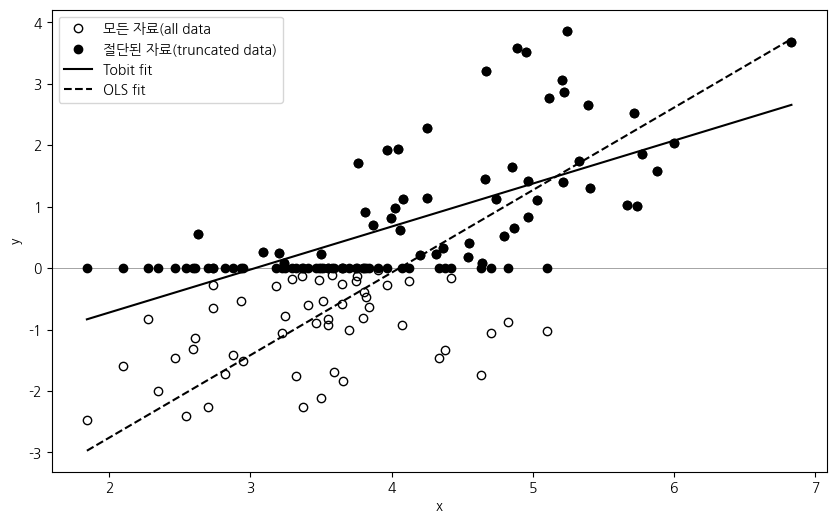

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.base.model as smclass

# random seed:
np.random.seed(1234567)

x = np.sort(stats.norm.rvs(0, 1, size=100) + 4)
xb = -4 + 1 * x
y_star = xb + stats.norm.rvs(0, 1, size=100)
y = np.copy(y_star)
y[y_star < 0] = 0

x_wc = pd.DataFrame({'const': 1, 'x': x})

# 추정 및 적합치 계산
reg_ols = sm.OLS(endog=y, exog=x_wc)
results_ols = reg_ols.fit()
yhat_ols = results_ols.fittedvalues

sigma_start = np.log(sum(results_ols.resid ** 2) / len(results_ols.resid))
params_start = np.concatenate((np.array(results_ols.params), sigma_start), axis=None)

# 함수이용
exec(open("Functions/Tobit.py").read()) 
reg_tobit = Tobit(endog=y, exog=x_wc)
results_tobit = reg_tobit.fit(start_params=params_start, disp=0)
print(results_tobit.summary())
yhat_tobit = np.dot(x_wc, np.transpose(results_tobit.params[0:2]))

# 데이터와 모형별 적합치 그래프
plt.figure(figsize =(10, 6))
plt.axhline(y=0, linewidth=0.5, linestyle='-', color='grey')
plt.plot(x, y_star, color='black', marker='o', fillstyle='none',
         linestyle='', label='모든 자료(all data')
plt.plot(x, y, color='black', marker='o', fillstyle='full',
         linestyle='', label='절단된 자료(truncated data)')
plt.plot(x, yhat_ols, color='black', marker='',
         linestyle='-', label='Tobit fit')
plt.plot(x, yhat_tobit, color='black', marker='',
         linestyle='--', label='OLS fit')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

### 나. 절단 회귀모형

In [20]:
import wooldridge as woo
import numpy as np
import patsy as pt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.base.model as smclass

recid = woo.dataWoo('recid')

# 절단된 회귀모형
# 절단된 샘플 더미변수(cens변수는 절단여부를 나타내는 더미변수)
censored = recid['cens'] != 0

# 종속변수와 독립변수 행렬정의
y, X = pt.dmatrices('ldurat ~ workprg + priors + tserved + felon +'
                    'alcohol + drugs + black + married + educ + age',
                    data=recid, return_type='dataframe')

# OLS추정후 파리미터와 표준오차를 초기값으로 지정
reg_ols = smf.ols(formula='ldurat ~ workprg + priors + tserved + felon +'
                          'alcohol + drugs + black + married + educ + age',
                  data=recid)
results_ols = reg_ols.fit()
sigma_start = np.log(sum(results_ols.resid ** 2) / len(results_ols.resid))
params_start = np.concatenate((np.array(results_ols.params), sigma_start),
                              axis=None)


# MLE 추정을 위한 클래스 정의
class CensReg(smclass.GenericLikelihoodModel):
    def __init__(self, endog, cens, exog):
        self.cens = cens
        super(smclass.GenericLikelihoodModel, self).__init__(endog, exog,
                                                             missing='none')

    def nloglikeobs(self, params):
        X = self.exog
        y = self.endog
        cens = self.cens
        p = X.shape[1]
        beta = params[0:p]
        sigma = np.exp(params[p])
        y_hat = np.dot(X, beta)
        ll = np.empty(len(y))
        # 검열되지 않음
        ll[~cens] = np.log(stats.norm.pdf((y - y_hat)[~cens] /
                                          sigma)) - np.log(sigma)
        # 검열됨
        ll[cens] = np.log(stats.norm.cdf(-(y - y_hat)[cens] / sigma))
        return -ll


# MLE 추정결과
reg_censReg = CensReg(endog=y, exog=X, cens=censored)
results_censReg = reg_censReg.fit(start_params=params_start,
                                  maxiter=10000, method='BFGS', disp=0)
print(results_censReg.summary())


# pytruncreg 활용을 통해서도 절단회귀모형 추정 가능
!pip install pytruncreg

                               CensReg Results                                
Dep. Variable:                 ldurat   Log-Likelihood:                -1597.1
Model:                        CensReg   AIC:                             3218.
Method:            Maximum Likelihood   BIC:                             3281.
Date:                Tue, 22 Jul 2025                                         
Time:                        12:40:18                                         
No. Observations:                1445                                         
Df Residuals:                    1434                                         
Df Model:                          10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0994      0.348     11.796      0.000       3.418       4.781
workprg       -0.0626      0.120     -0.521      0.6

### 다. 헥크만의 선택 편의 교정모형

In [21]:

import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats

# Hecket의 Sample Selection Model
mroz = woo.dataWoo('mroz')
#print(mroz)

df = mroz[['lwage', 'inlf', 'educ', 'exper', 'nwifeinc', 'age', 'kidslt6']]
y=df['lwage']
X=df[['educ', 'exper']]
X=sm.add_constant(X)
W=df[['educ', 'exper', 'nwifeinc', 'age', 'kidslt6']]
W=sm.add_constant(W)

# 1) 수식이용
# step 1: 모든 관측치를 이용한 프로빗 모형의 추정
reg_probit = smf.probit(formula='inlf ~ educ + exper +'
                                'nwifeinc + age + kidslt6',
                        data=mroz)
results_probit = reg_probit.fit(disp=0)
pred_inlf = results_probit.fittedvalues
mroz['inv_mills'] = stats.norm.pdf(pred_inlf) / stats.norm.cdf(pred_inlf)
print(results_probit.summary())
print(mroz['inv_mills'])
# step 2: y를 X와 Inverse Mill's ratio에 대해 회귀분석
reg_heckit = smf.ols(formula='lwage ~ educ + exper + inv_mills',
                     subset=(mroz['inlf'] == 1), data=mroz)
results_heckit = reg_heckit.fit()
print(results_heckit.summary())

# 2) 함수이용
exec(open("Functions/heckman.py").read()) 
res = Heckman(y, X, W).fit(method='twostep')
print(res.summary())

                          Probit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      747
Method:                           MLE   Df Model:                            5
Date:                Tue, 22 Jul 2025   Pseudo R-squ.:                  0.2104
Time:                        12:41:28   Log-Likelihood:                -406.54
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 7.707e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7645      0.440      1.737      0.082      -0.098       1.627
educ           0.1315      0.025      5.267      0.000       0.083       0.180
exper          0.0691      0.007      9.293      0.0

# Chapter 3: 집계자료 회귀모형

## 3. 포아송 회귀모형, 음이항 회귀모형의 추정

In [22]:
import wooldridge as woo
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson, NegativeBinomial

df = woo.dataWoo('crime1')
df = sm.add_constant(df)

y = df['narr86']
X = df[['const', 'pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86', 'inc86', 'black', 'hispan', 'born60']]

# 포아송 모형(Poisson model)
reg_poisson = Poisson(endog=y, exog=X)
results_poisson = reg_poisson.fit(disp=0)
print(results_poisson.summary())

# 음이항 모형(Negative binomial regression model)
reg_nbinorm = NegativeBinomial(endog=y, exog=X)
results_nbinorm = reg_nbinorm.fit(disp=0)
print(results_nbinorm.summary())


                          Poisson Regression Results                          
Dep. Variable:                 narr86   No. Observations:                 2725
Model:                        Poisson   Df Residuals:                     2715
Method:                           MLE   Df Model:                            9
Date:                Tue, 22 Jul 2025   Pseudo R-squ.:                 0.07910
Time:                        12:44:41   Log-Likelihood:                -2248.8
converged:                       True   LL-Null:                       -2441.9
Covariance Type:            nonrobust   LLR p-value:                 1.134e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5996      0.067     -8.916      0.000      -0.731      -0.468
pcnv          -0.4016      0.085     -4.726      0.000      -0.568      -0.235
avgsen        -0.0238      0.020     -1.192      0.2